# O Bongo de Feynmann

In [1]:
#Bibliotecas Cálculo
import numpy as np
from scipy.special import jv, jn_zeros

#Biblioteca Gráfica
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import Arc

#Interpolador (cubic spline)
from scipy.interpolate import interp1d as interpol 

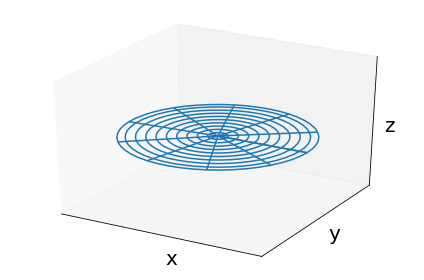

In [2]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#Membrana em coordenadas polares
r = np.linspace(0, 1.25, 50)
p = np.linspace(0, 2*np.pi, 50)
R, P = np.meshgrid(r, p)
Z = R-R+0.5
#Converte coordenadas em cartesianas
X, Y = R*np.cos(P), R*np.sin(P)

ax.plot_wireframe(X, Y, Z, cmap='winter', rstride=5, cstride=5)

ax.grid(False)

ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

ax.text(0, -1.3, 0.46, 'x', fontsize = 20)
ax.text(1.35, 0.5, 0.46, 'y', fontsize = 20)
ax.text(1.7, 1.2, 0.5, 'z', fontsize = 20)

plt.tight_layout()
#fig.savefig('Membrana.pdf')

figura representativa da componente vertical da força de tensão

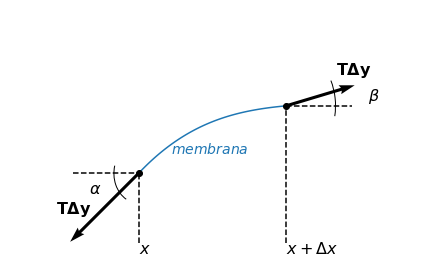

In [3]:
fig = plt.figure()
ax  = fig.add_subplot(111)

ax.set_frame_on(False)
ax.axes.get_yaxis().set_visible(False)
ax.axes.get_xaxis().set_visible(False)

#Variáveis utilizadas na construção da membrana
x = [3, 6, 9, 12]
y = [2, 4, 5, 5.4]

x_bord = [3, 12]
y_bord = [2, 5.4]

x_dash = np.array([x_bord[0]-4, x[0]])
y_dash = np.array([y[0], y[0]])

spline = interpol(x, y, kind='cubic')
x = np.linspace(x[0], x[-1], 100)

#-----Tracejados
#horizontais
plt.plot(x_dash, y_dash, '--', color = 'black')
plt.plot(x_dash + 13, y_dash + 3.4, '--', color = 'black')
#verticais
plt.plot([3, 3],   [-1.5, y[0]],  '--', color = 'black')
plt.plot([12, 12], [-1.5, y[-1]], '--', color = 'black')

#Representação da Membrana
plt.plot(x, spline(x))
plt.plot(x_bord, y_bord,'o', color = 'black')
ax.text(5, 3, r'$membrana$', fontsize = 14, color = '#1f77b4')

#Setas (Tensão)
plt.quiver(x_bord[0], y_bord[0], -1, -1, scale = 6)
ax.text(15, 7, r'$\bf{T\Delta y}$', fontsize = 16)

plt.quiver(x_bord[-1], y_bord[-1], 1, 0.3, scale = 6)
ax.text(-2, 0, r'$\bf{T\Delta y}$', fontsize = 16)

#Ângulos
a = Arc((3, 2), 3, 3, 10, 155, 230, color='black', lw=1)
ax.add_patch(a)
ax.text(0, 1, r'$\alpha$', fontsize = 16)

b = Arc((12, 5.4), 6, 6, 10, 340, 375, color='black', lw=1)
ax.add_patch(b)
ax.text(17, 5.7, r'$\beta$', fontsize = 16)

#Valores abcissa
ax.text(3, -2, r'$x$', fontsize = 16)
ax.text(12, -2, r'$x + \Delta x$', fontsize = 16)

plt.xlim(-5, 20)
plt.ylim(-3,10.4)

fig.tight_layout()
#fig.savefig('horizontal.pdf')

Usaram-se as seguintes constantes:

In [4]:
raio         = 1
c            = 0.75
t            = 0
Bessel_roots = [jn_zeros(m, 10) for m in range(10)]

In [5]:
modos = ((0, 1),(0, 2),(0, 3),(1, 1),(1, 2),(1, 3),(2, 1),(2, 2),(2, 3),(3, 3))

In [6]:
def lambda_mn(m, n, raio):
    return Bessel_roots[m][n - 1] / raio

Da solução geral obtida, para A = 0, B = 1, C = 1, D = 0, tem-se:

In [7]:
def func_onda(r, theta, t, m, n, raio, c):
    l = lambda_mn(m, n, raio)

    T = np.sin(c * l * t)
    R = jv(m, l * r)
    Theta = np.cos(m * theta)

    return R * T * Theta

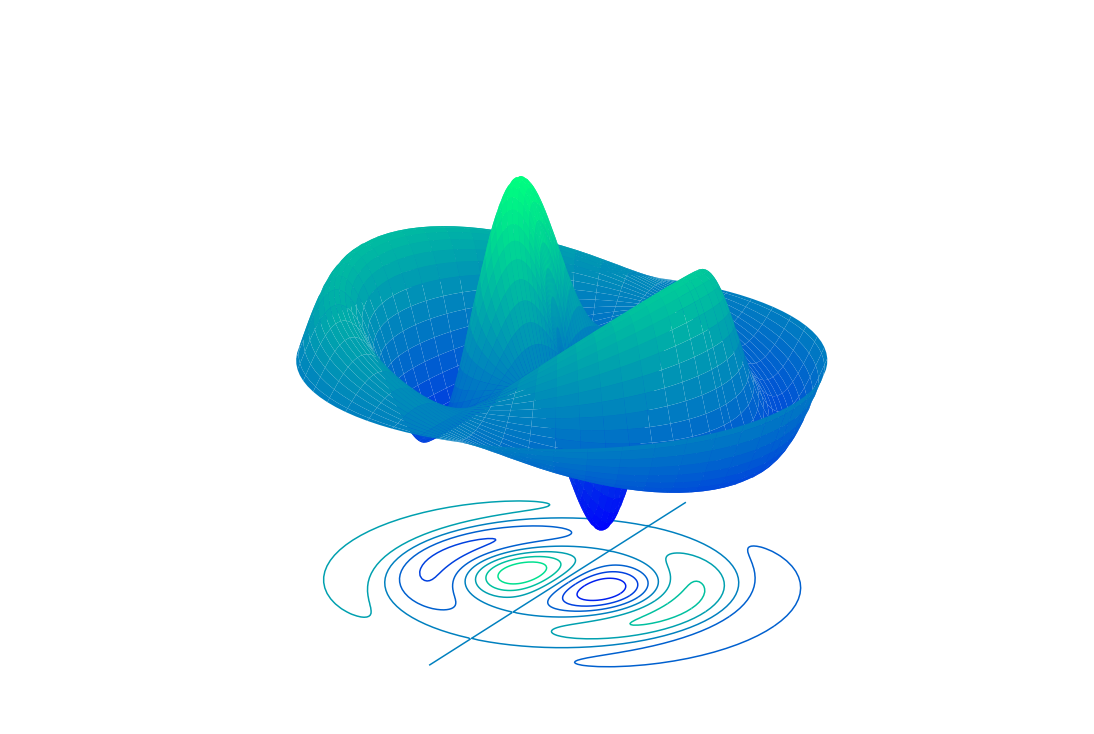

In [8]:
r = np.linspace(0, raio, 100)
theta = np.linspace(0, 2 * np.pi, 100)

r, theta = np.meshgrid(r, theta)
x = np.cos(theta) * r
y = np.sin(theta) * r

fig = plt.figure(figsize=(15, 10))
ax = fig.add_axes([0, 0, 1, 1], projection='3d')
ax.set_axis_off()

m, n = modos[5]
t = 2*np.pi/(lambda_mn(m, n, raio))

ax.cla()
ax.set_axis_off()
z = func_onda(r, theta, t, m, n, raio, c)

ax.plot_surface(x, y, z, cmap='winter')
ax.contour(x, y, z, zdir='z', offset=-0.8, cmap='winter')

#fig.savefig('modo_5.pdf')